In [280]:
"""
updated 2019-08-05 
written by Minhae Kwon
Multinomial logistic regression for "Decoding" process
ref: https://chrisalbon.com/machine_learning/naive_bayes/multinomial_logistic_regression/
"""
from pandas import DataFrame, read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Since the code does not work with current data set, I tried using IRIS data

In [281]:
USE_IRIS_DATA = False #if false use our data

# in order to confirm my code, use well-known iris data
if USE_IRIS_DATA: 
    from sklearn import datasets

    # Load data
    iris = datasets.load_iris()
    nb_df = iris.data
    a_df = iris.target
else: 
    nb_df = read_csv('./data/bb_df.csv').to_numpy() #nueral estimate (from encoding) for belief =[belief for box1, beleif for box2]
    a_df = read_csv('./data/a_df.csv').to_numpy().reshape(-1) # action


In [282]:
TEST_SIZE = 0.3  # ratio of test data set 
N_SPLITS = 5 # "K" in K-fold cross validation 

# separate test data set
nb_df_train, nb_df_test, a_df_train, a_df_test = train_test_split(nb_df, a_df, test_size=TEST_SIZE, random_state = 1)

In [283]:
# now we use only train data 
# why use StratifiedKFold?: The folds are made by preserving the percentage of samples for each class.
X = nb_df_train#.to_numpy()
#print(X)
y = a_df_train#.to_numpy()

In [284]:
k_fold = StratifiedKFold(n_splits=N_SPLITS) # seperate train data and validation data

In [285]:
# Standarize features
scaler = StandardScaler()
# Create multinomial logistic regression object
regr = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [286]:
for train_index, val_index in k_fold.split(X, y):
    #print("TRAIN:", train_index, "TEST:", val_index)
    x_train_kf, x_val_kf = X[train_index], X[val_index]
    y_train_kf, y_val_kf = y[train_index], y[val_index]
    #print('x_train_kf:', x_train_kf)
    #print('y_train_kf:',y_train_kf)
    x_train_kf_std = scaler.fit_transform(x_train_kf)
    regr = regr.fit(x_train_kf_std, y_train_kf.ravel()) # fit the model
    #print(y_train_kf)
    #regr.fit(x_train_kf, y_train_kf.ravel()) # fit the model
    # validation
    x_val_kf_std = scaler.fit_transform(x_val_kf)
    a_val = regr.predict(x_val_kf_std) # predict based on current model -> use validation data for evaluation
    #a_val = regr.predict(x_val_kf) # predict based on current model -> use validation data for evaluation
    # View predicted probabilities
    #print(regr.predict_proba(x_val_kf))
    print(a_val)
    print(y_val_kf)
    
    #print('score', regr.score(x_val_kf, a_val))
    print('score', r2_score(y_val_kf, a_val, multioutput='uniform_average'))#, multioutput='raw_values')) # get r2 score

[0 0 0 ... 0 0 0]
[1 2 2 ... 2 2 4]
score -1.3603634009319818
[0 0 0 ... 0 0 0]
[3 3 3 ... 3 0 3]
score -1.3589086860363504
[0 0 0 ... 0 0 0]
[4 2 2 ... 4 4 4]
score -1.3571677593258675
[0 0 0 ... 0 0 0]
[2 2 2 ... 4 4 4]
score -1.3595773472124533
[0 0 0 ... 0 0 0]
[2 2 2 ... 3 3 1]
score -1.3586482181112407


In [287]:
### evaluate model with test data
nb_df_test_std = scaler.fit_transform(nb_df_test)
a_dec_test = regr.predict(nb_df_test_std)

print(a_dec_test)
print(a_df_test)

[0 0 0 ... 0 0 0]
[0 2 0 ... 1 0 1]


In [288]:
decoding_error = a_df_test - a_dec_test.reshape(-1,1) # true - estimate
print('mean decoding error mean: \n', np.mean(decoding_error))
print('mean decoding error std:\n', np.std(decoding_error))
print('score', r2_score(a_df_test, a_dec_test, multioutput='raw_values'))



#a_dec_df_test = DataFrame(a_dec_test, columns =a_df.columns) 

mean decoding error mean: 
 1.6171929824561404
mean decoding error std:
 1.377177069971765
score [-1.37893606]


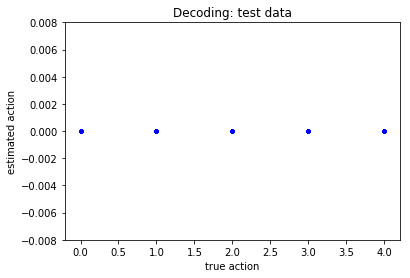

In [289]:
# plot: compare raw data vs prediction
plt.scatter(a_df_test, a_dec_test, s=10, c='blue', marker='o')
plt.xlabel('true action')
plt.ylabel('estimated action')
plt.title('Decoding: test data')
plt.show()

In [279]:
"""
# plot: compare raw data vs prediction
plt.scatter(a_df_test['action'], a_dec_df_test['action'], s=10, c='blue', marker='o')
plt.xlabel('true action')
plt.ylabel('estimated action')
plt.title('Decoding: test data')
plt.show()
"""

"\n# plot: compare raw data vs prediction\nplt.scatter(a_df_test['action'], a_dec_df_test['action'], s=10, c='blue', marker='o')\nplt.xlabel('true action')\nplt.ylabel('estimated action')\nplt.title('Decoding: test data')\nplt.show()\n"

In [ ]:
"""

######

X_std = scaler.fit_transform(X)

policy = regr.fit(X_std, Y) # Train model

# Create new belief
new_belief = [[.5, .5, .5, .5]]
# Predict class
policy.predict(new_belief)

# View predicted probabilities
model.predict_proba(new_belief)


# holdout one at a time.
kf = KFold(len(gamedf), n_folds=50, shuffle=False)
print("Average CV accuracy:", cross_val_score(logreg, X, y, cv=kf).mean())
"""